In [1]:
import pandas as pd

###`Q-1:` You are given a Multi index DataFrame. You task is to swap level-0 index with level-0 column.
* Change Branch -> ('cse', 'ece') as columns at level-0 and ('delhi'	'mumbai') as level-0 Index
* And Sort on row index level-0

In [2]:
# Given Code Snippets
index_val = [('cse',2019),('cse',2020),('cse',2021),('cse',2022),('ece',2019),('ece',2020),('ece',2021),('ece',2022)]
multiindex = pd.MultiIndex.from_tuples(index_val)
df = pd.DataFrame(
    [
        [1,2,0,0],
        [3,4,0,0],
        [5,6,0,0],
        [7,8,0,0],
        [9,10,0,0],
        [11,12,0,0],
        [13,14,0,0],
        [15,16,0,0],
    ],
    index = multiindex,
    columns = pd.MultiIndex.from_product([['delhi','mumbai'],['avg_package','students']])
)

df

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0

In [3]:
df.unstack().swaplevel(axis=1).stack().transpose()

C:\Users\panka\AppData\Local\Temp\ipykernel_13696\1482105945.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  df.unstack().swaplevel(axis=1).stack().transpose()


cse                  ece         
            avg_package students avg_package students
delhi  2019           1        2           9       10
       2020           3        4          11       12
       2021           5        6          13       14
       2022           7        8          15       16
mumbai 2019           0        0           0        0
       2020           0        0           0        0
       2021           0        0           0        0
       2022           0        0           0        0

###`Q-2:` Covid Cases Data Set Problem
 Make a DataFrame Using both Covid Dataset. With Country name as Level-0 and Provinance/State as Level-1 Index and date, No of cases and No of Deaths as Columns.

In [4]:
confirm = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTmqT3kxd0i0RUFiEnwA1Hboiunv28MeNTatZsIEqlPPB7mHrl0ttJL7utZ23_1s5FW8ZjODmB8jHIi/pub?gid=2142019845&single=true&output=csv')

death = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQn4nLCKIVZMw4e89YeRqgKaSAAwRFaZ6ILMW_FUejZ2tkv3Np1f9gD4QOl3ASHeLzWjOjfmLDKcCOF/pub?gid=212966958&single=true&output=csv")

In [26]:
df1=death.melt(id_vars=["Country/Region","Province/State","Lat","Long"],var_name="date",value_name="death")
df2=confirm.melt(id_vars=["Country/Region","Province/State","Lat","Long"],var_name="date",value_name="confirmed")
df1["Confirmed"]=df2["confirmed"]
df1.sort_values("Country/Region",inplace=True)
df1.reset_index(inplace=True,drop=True)
ml2=pd.MultiIndex.from_product([death["Country/Region"].values,df2["date"].unique().tolist()])
df1.set_index(ml2,inplace=True)
df1.drop(columns=["Lat","Long","Province/State","Country/Region","date"],inplace=True)
df1.head()

death  Confirmed
Afghanistan 1/22/20      0          0
            1/23/20    239      13102
            1/24/20   7777     192906
            1/25/20   7829     204417
            1/26/20      0         14

###`Q-3:` Show Country with Heighest death percent out of confirmed Cases.

In [6]:
s=df1["death"]/df1["Confirmed"]
s.sort_values(ascending=False)

Canada    8/23/21     inf
          8/25/21     inf
          8/31/21     inf
          2/18/21     inf
          8/5/21      inf
                     ... 
Zimbabwe  11/10/22    NaN
          12/6/22     NaN
          12/7/22     NaN
          12/18/22    NaN
          12/28/22    NaN
Length: 311253, dtype: float64

### `Q-4` : Make a dataframe for India from Covid Data with one extra column representing no of new cases.

* Just for Assumption "No of new cases" will be equal to difference of "no of cases" with previous day.
* First day new cases will be NaN or equal to no of cases

Say on 12/30/22 No of cases is - 44679608	and a day previous (12/29/22) no of cases is - 44679382.

Then for 12/30/22 -> No of New Cases  = 44679608 - 44679382 =

Note:- Try using shift Function

Try using the shift function

```
s = pd.Series([1,2,3,4,5,6])
s #-> [1,2,3,4,5,6]
s.shift(1) #-> [NaN, 1,2,3,4,5]
s.shift(-1) #-> [2,3,4,5,6, NaN]
```

In [7]:
df1=df1.loc["India"]
df1

,death,Confirmed
1/22/20,500055,41952712
1/23/20,154392,10757610
1/24/20,165101,12589067
1/25/20,13699,425282
1/26/20,126611,8553657
...,...,...
12/29/22,0,1
12/30/22,96318,6145291
12/31/22,7750,276146
1/1/23,325972,27894800


In [8]:
df1["new cases"]=df1["Confirmed"]-df1["Confirmed"].shift(-1)

In [9]:
df1

,death,Confirmed,new cases
1/22/20,500055,41952712,31195102.0
1/23/20,154392,10757610,-1831457.0
1/24/20,165101,12589067,12163785.0
1/25/20,13699,425282,-8128375.0
1/26/20,126611,8553657,-981307.0
...,...,...,...
12/29/22,0,1,-6145290.0
12/30/22,96318,6145291,5869145.0
12/31/22,7750,276146,-27618654.0
1/1/23,325972,27894800,23690187.0


### `Q-5:` Read the Dataset using the below given link and create a multi-index dataframe using the columns "Country" and "City/Town".

This dataset is about the most polluted cities in the world. You can get details from [here](https://www.kaggle.com/datasets/rajkumarpandey02/worlds-most-air-polluted-countries-cities).

**Dataset link:** https://tinyurl.com/2fe6vz4u Directly use this link to read.

**Task:**
1. Find out the name of the city of India which is most poluted based on PM10.
2. Find out the name of the city of India which has minumum pollution level based on PM10.
3. Do same operations (like 1 and 2) with the country China.
4. Make a pie chart based on the column "PM10" of the country Poland.
5. Make a bar chart based on the columns "PM2.5" and "PM10" of the countries Israel and Qatar.
6. Convert this MultiIndex DataFrame to Series by retaining the informations.

In [101]:
df=pd.read_csv("https://tinyurl.com/2fe6vz4u")
df.head()

,Unnamed: 0,Position,Country,City/Town,Year,PM2.5,Temporal coverage,PM10,Temporal coverage.1,Database version (year)
0,0,1,India,Kanpur,2016,173,>75%,319,NaN,2018
1,1,2,India,Faridabad,2016,172,>75%,316,NaN,2018
2,2,3,India,Gaya,2016,149,50% -< 75%,275,NaN,2018
3,3,4,India,Varanasi,2016,146,>75%,260,NaN,2018
4,4,5,India,Patna,2016,144,>75%,266,NaN,2018


In [108]:
df.set_index(["Country","City/Town"],inplace=True)

In [112]:
df.loc["India"][df.loc["India"]["PM10"]==df.loc["India"]["PM10"].max()]

,Unnamed: 0,Position,Year,PM2.5,Temporal coverage,PM10,Temporal coverage.1,Database version (year)
City/Town,,,,,,,,
Kanpur,0,1,2016,173,>75%,319,NaN,2018


In [113]:
df.loc["India"][df.loc["India"]["PM10"]==df.loc["India"]["PM10"].min()]

,Unnamed: 0,Position,Year,PM2.5,Temporal coverage,PM10,Temporal coverage.1,Database version (year)
City/Town,,,,,,,,
Aizawl,483,484,2016,27,NaN,44,NaN,2018


([<matplotlib.patches.Wedge at 0x248a2b96b40>,
 [Text(1.075202185099875, 0.2322504276776564, 'Godów'),
  Text(0.8994167105915309, 0.6332847548368036, 'Pleszew'),
  Text(0.5671895046577834, 0.942494597229108, 'Gliwice'),
  Text(0.11678509526605145, 1.093782995627423, 'Kraków'),
  Text(-0.32955078713992497, 1.0494742868195752, 'Nowy Sącz'),
  Text(-0.7169761451062191, 0.834233305106327, 'Katowice'),
  Text(-0.9732224940680934, 0.5126772640169255, 'Bochnia'),
  Text(-1.0915969246845427, 0.13570613110412125, 'Piotrków Trybunalski'),
  Text(-1.05952750814279, -0.29563737836872145, 'Żory'),
  Text(-0.870336594580705, -0.6726917660664963, 'Bielsko-Biała'),
  Text(-0.5718456063159527, -0.9396768607011352, 'Tarnowskie Góry'),
  Text(-0.20291078950430042, -1.0811231250429998, 'Chełm'),
  Text(0.16535598551007633, -1.0875005278417071, 'Kalisz'),
  Text(0.5006016768973379, -0.9794886222348749, 'Kędzierzyn-Koźle'),
  Text(0.7768550283971853, -0.7787787008220041, 'Lublin'),
  Text(0.9706742071276675

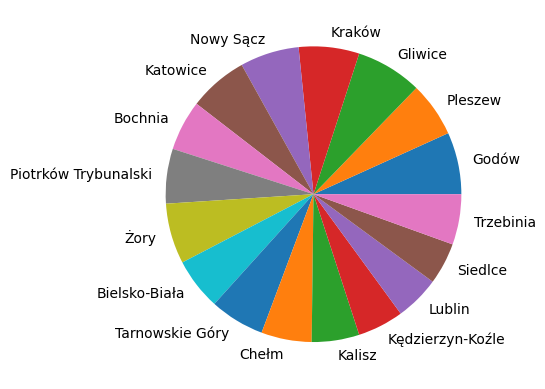

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt 
plt.pie(df.loc["Poland"]["PM10"],labels=df.loc["Poland"].index)

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 500 entries, ('India', 'Kanpur') to ('Turkey', 'Sivas')
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               500 non-null    int64 
 1   Position                 500 non-null    int64 
 2   Year                     500 non-null    int64 
 3   PM2.5                    500 non-null    int64 
 4   Temporal coverage        86 non-null     object
 5   PM10                     500 non-null    int64 
 6   Temporal coverage.1      52 non-null     object
 7   Database version (year)  500 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 54.2+ KB
